## Heart attack analysis and prediction

### Variables-
* **Age** - age of patient
* **Sex** - gender of the patient
* **cp** - Chest Pain type 
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps** - resting blood pressure (in mm Hg)
* **chol** - cholestoral in mg/dl
* **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **_restecg** - resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (possible heart strain)
    * Value 2: showing probable or definite left ventricular hypertrophy (enlarged muscle)
* **thalach** - maximum heart rate achieved
* **exang** -  exercise induced (chest pain)angina (1 = yes; 0 = no)
* **oldpeak** - ST depression induced by exercise relative to rest (hearts ability to get oxygen)
* **slp** - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
* **ca** - number of major vessels (0-3)
* **thal** - Thallium stress test - 2 = normal; 1 = fixed defect; 3 = reversable defect
* **output** - chance of hear attack
    * 0= less chance of heart attack
    * 1= more chance of heart attak

#### dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('datasets/heart.csv')

In [3]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### Output analysis
* the data has 303 rows and 14 columns
* all the variables are in numerical format
* there are no missing values 

### Preparation for Exploratory Data Analysis (EDA)

#### missing values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### examining unique values

In [7]:
unique=[]
for i in df.columns:
    x=df[i].value_counts().count()
    unique.append(x)
un=pd.DataFrame(unique,index=df.columns,columns=['Total unique values'])
un

,Total unique values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


##### output analysis
* variables with few unique values are categorical 
* variables with high unique values are numeric
* numeric - age, trtbps, chol, thalachh, oldpeak
* categorical - sex, cp, fbs, restecg, exng, slp, caa, thall, output

#### sperating variables as categoric and numeric

In [8]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

#### observing statistics

In [9]:
df[numeric_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


#### outliers

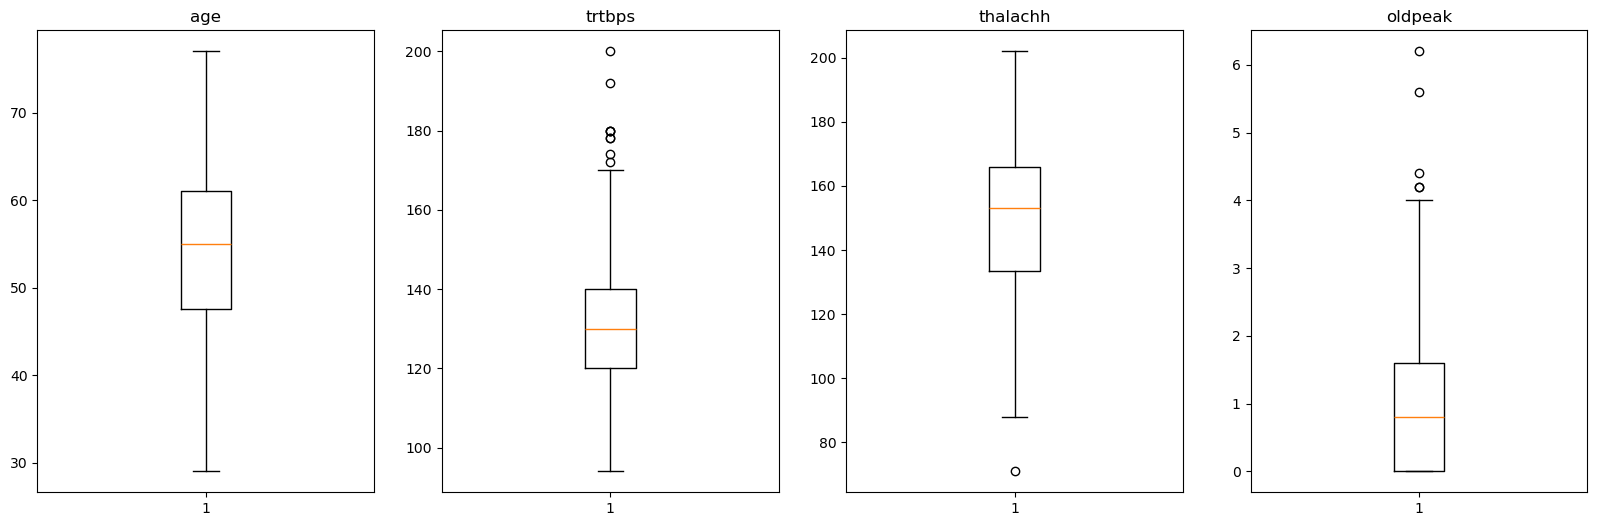

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalachh"])
ax3.set_title("thalachh")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()


### Exploratory Data Analysis

#### numeric data visualisations

##### age

<Axes: xlabel='age', ylabel='Count'>

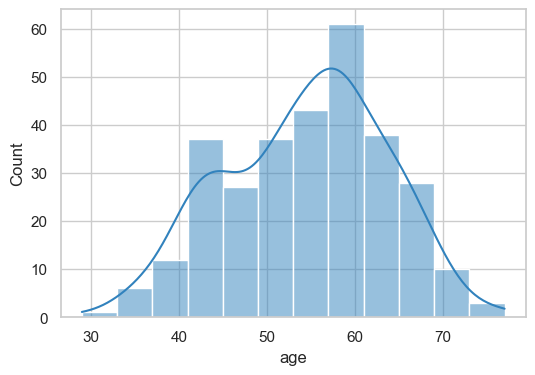

In [11]:
sns.set(style= 'whitegrid',rc={"figure.figsize": (6, 4)},palette='tab20c')
sns.histplot(df['age'], kde=True)

* it follows a normal distrbution

##### trtbps

Text(0.5, 1.0, 'trtbps')

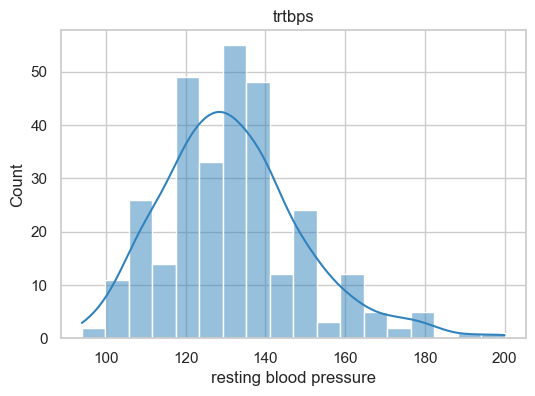

In [12]:
sns.histplot(df['trtbps'],kde=True)
plt.xlabel('resting blood pressure')
plt.title('trtbps')

* it is noramly distributed with some right skewness

##### chol

Text(0.5, 1.0, 'chol')

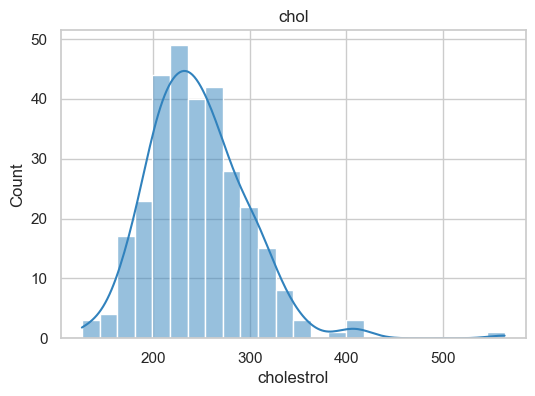

In [13]:
sns.histplot(df['chol'],kde=True)
plt.xlabel('cholestrol')
plt.title('chol')

##### thalachh

Text(0.5, 0, 'maximum heart rate acheived')

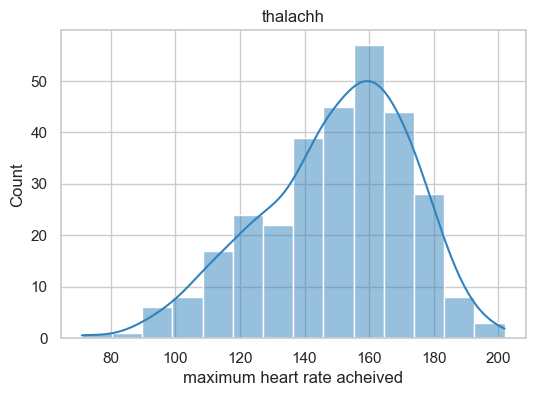

In [14]:
sns.histplot(df['thalachh'],kde=True)
plt.title('thalachh')
plt.xlabel('maximum heart rate acheived')

##### oldpeak

Text(0.5, 0, 'st depression(hearts ability to get o2)')

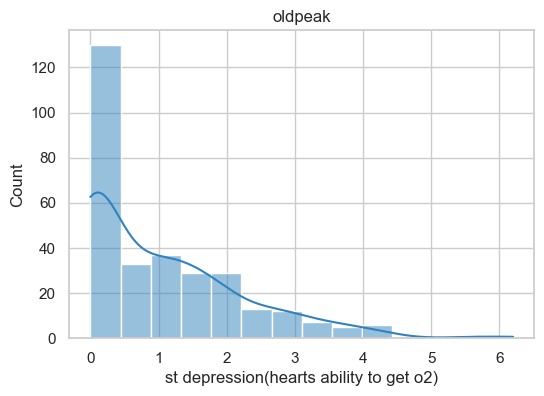

In [15]:
sns.histplot(df['oldpeak'],kde=True)
plt.title('oldpeak')
plt.xlabel('st depression(hearts ability to get o2)')

#### categorical data visulaisations

##### sex

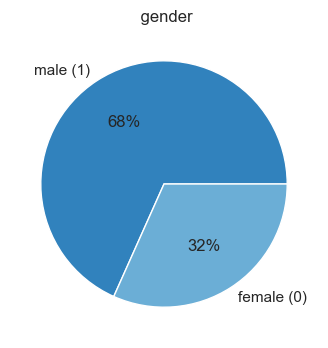

In [16]:
x=df['sex'].value_counts()
plt.pie(x,autopct='%.0f%%',labels=['male (1)','female (0)'])
plt.title(' gender')
plt.show()


* number of male patients are more than twice of the female patients
  

##### cp

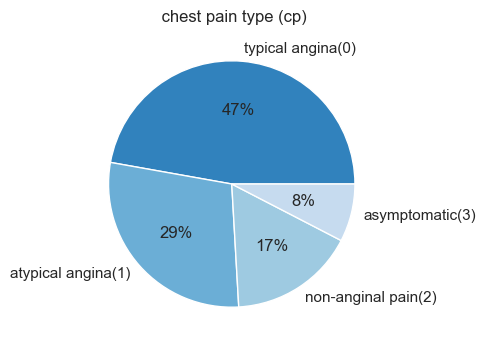

In [17]:
x=df['cp'].value_counts()
plt.pie(x,autopct='%.0f%%',labels=['typical angina(0)','atypical angina(1)','non-anginal pain(2)','asymptomatic(3)'])
plt.title(' chest pain type (cp)')
plt.show()


##### fbs

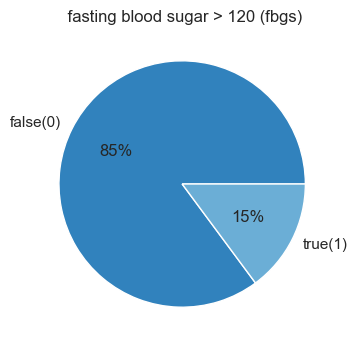

In [18]:
x=df['fbs'].value_counts()
plt.pie(x,autopct='%.0f%%',labels=['false(0)','true(1)'])
plt.title(' fasting blood sugar > 120 (fbgs)')
plt.show()

##### restecg

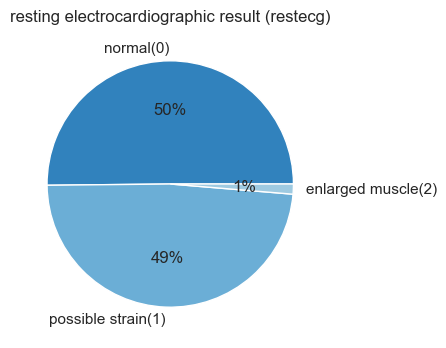

In [19]:
x=df['restecg'].value_counts()
plt.pie(x,autopct='%.0f%%',labels=['normal(0)','possible strain(1)','enlarged muscle(2)'])
plt.title('resting electrocardiographic result (restecg)')
plt.show()

##### exng 

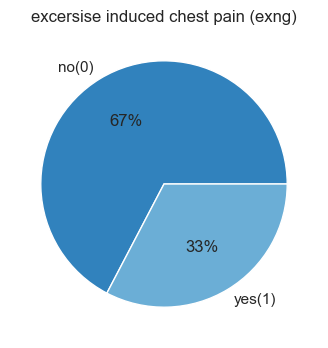

In [20]:
x=df['exng'].value_counts()
plt.pie(x,autopct='%.0f%%',labels=['no(0)','yes(1)'])
plt.title('excersise induced chest pain (exng)')
plt.show()

##### slp 

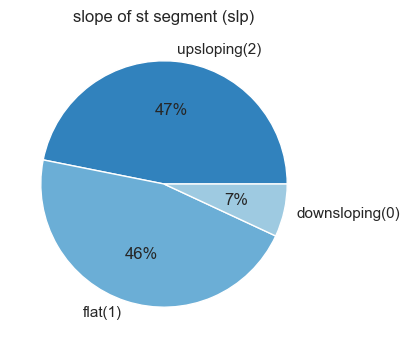

In [21]:
x=df['slp'].value_counts()
plt.pie(x,autopct='%.0f%%',labels=['upsloping(2)','flat(1)','downsloping(0)'])
plt.title('slope of st segment (slp)')
plt.show()

##### caa

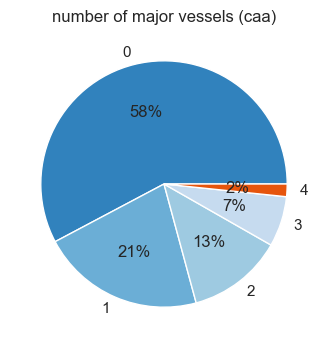

In [22]:
x=df['caa'].value_counts()
plt.pie(x,autopct='%.0f%%',labels=x.index)
plt.title('number of major vessels (caa)')
plt.show()

##### thall

In [23]:
x=df['thall'].value_counts()

* There are three observation values in the description of this variable. However, the table shows four values.
* 0 is null value. we replace this with 2

In [24]:
df['thall']=df['thall'].replace(0,2)

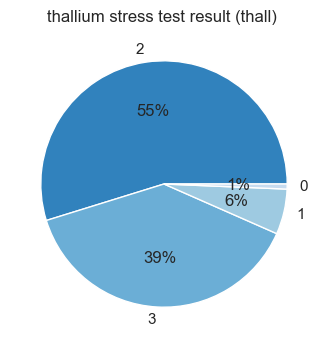

In [25]:
plt.pie(x,autopct='%.0f%%',labels=x.index)
plt.title('thallium stress test result (thall) ')
plt.show()

##### output

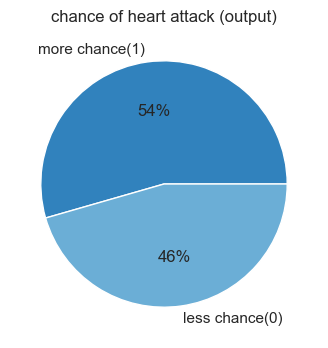

In [26]:
x=df['output'].value_counts()
plt.pie(x,autopct='%.0f%%',labels=['more chance(1)','less chance(0)'])
plt.title('chance of heart attack (output)')
plt.show()

#### Target variable with respect to numerical variables

In [27]:
sns.set(palette='deep')

##### age

<Axes: xlabel='age', ylabel='Density'>

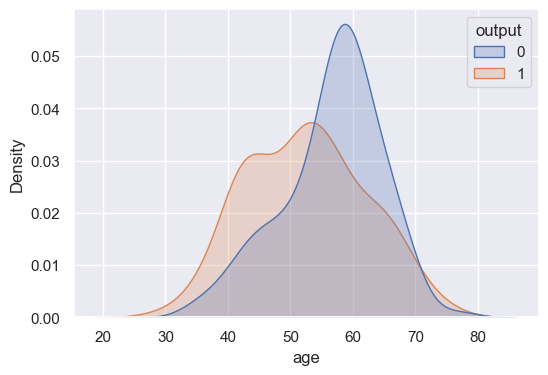

In [28]:
sns.kdeplot(data=df, x="age", hue="output", fill=True, common_norm=False)

* there is a decrease in heart attack risk after the age of 55.

##### trtbps - resting blood pressure

<Axes: xlabel='trtbps', ylabel='Density'>

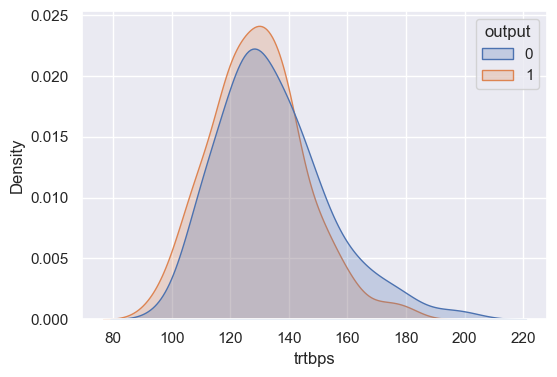

In [29]:
sns.kdeplot(data=df, x="trtbps", hue="output", fill=True, common_norm=False)

##### chol- cholestrol

<Axes: xlabel='chol', ylabel='Density'>

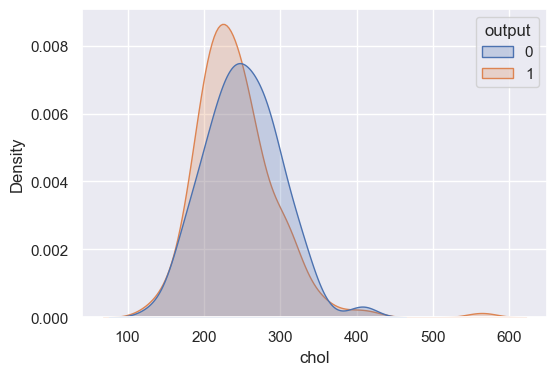

In [30]:
sns.kdeplot(data=df, x="chol", hue="output", fill=True, common_norm=False)

<Axes: xlabel='thalachh', ylabel='Density'>

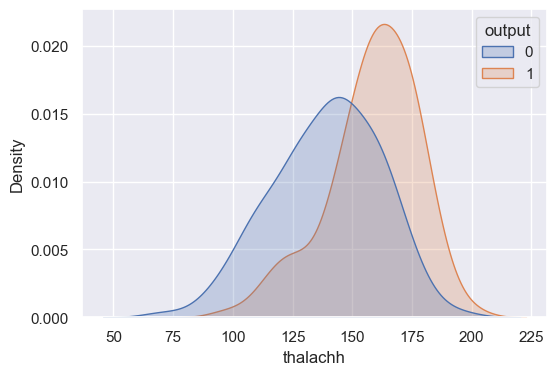

In [31]:
sns.kdeplot(data=df, x="thalachh", hue="output", fill=True, common_norm=False)

* The higher the maximum reached heart rate, the higher the probability of the patient having a heart attack.

<Axes: xlabel='oldpeak', ylabel='Density'>

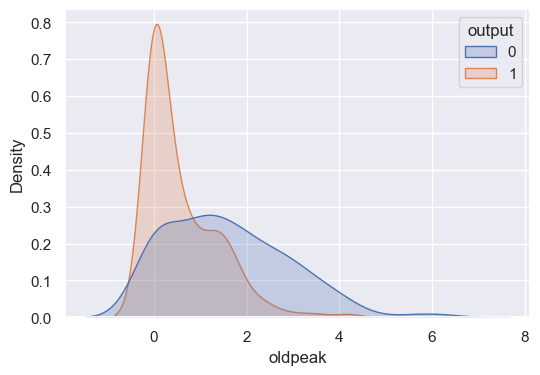

In [32]:
sns.kdeplot(data=df, x="oldpeak", hue="output", fill=True, common_norm=False)

* if the value of this variable is between 0 and 1.5, there is a significant increase in the probability of having a heart attack.

#### Target variable with respect to categorical variables

##### gender

<Axes: xlabel='sex', ylabel='count'>

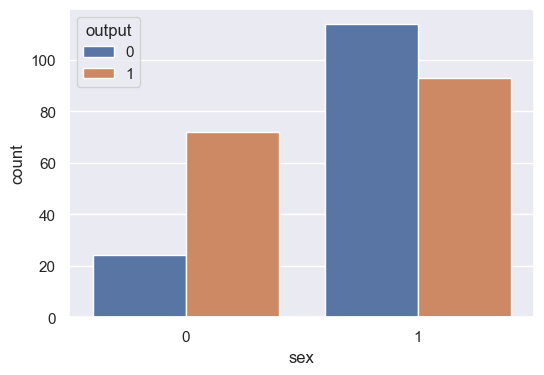

In [33]:
sns.countplot(x='sex',data=df,hue='output')

* female patients are at a higher risk of heart attack

##### cp - chest pain type

<Axes: xlabel='cp', ylabel='count'>

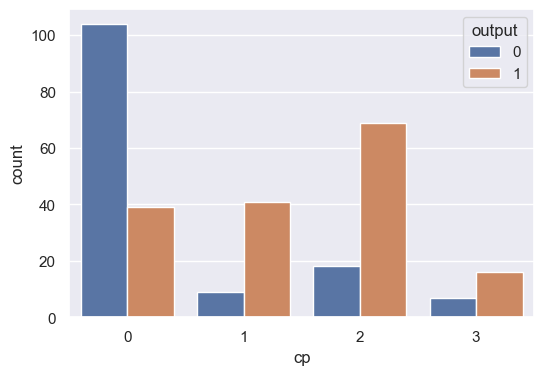

In [34]:
sns.countplot(x='cp',data=df,hue='output')

* chest pain type 2 - non-anginal pain has highest risk of heart attack

##### fbs- fasting blood sugar

<Axes: xlabel='fbs', ylabel='count'>

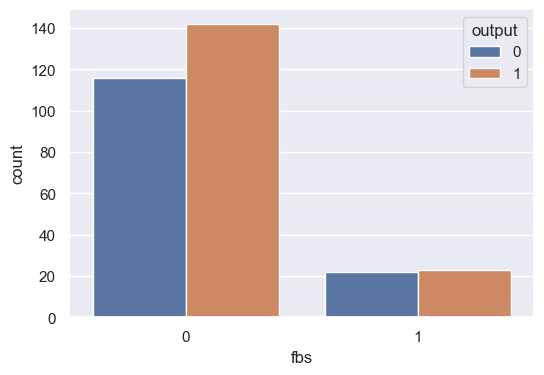

In [35]:
sns.countplot(x='fbs',data=df,hue='output')

##### restecg

<Axes: xlabel='restecg', ylabel='count'>

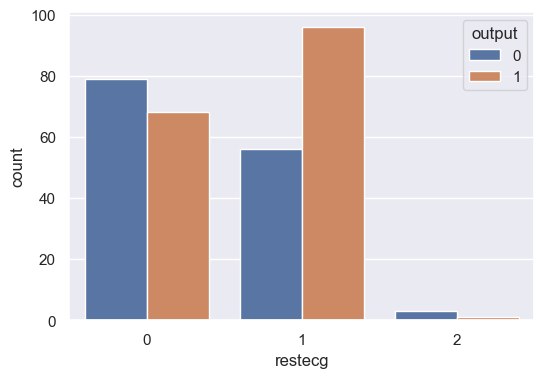

In [36]:
sns.countplot(x='restecg',data=df,hue='output')

* people with restecg 1- possible strain on heart have highest risk of attack

##### exng - pain due to excersise

<Axes: xlabel='exng', ylabel='count'>

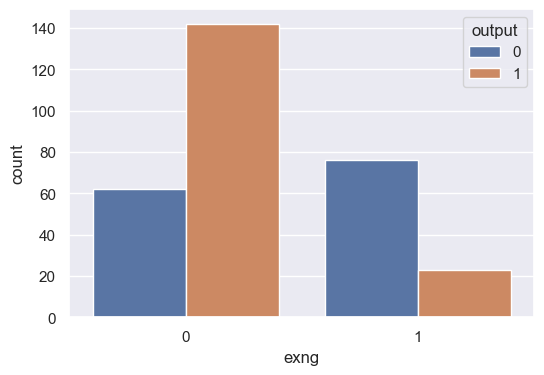

In [37]:
sns.countplot(x='exng',data=df,hue='output')

* patients who do not have pain related to excersie are more likely to have a heart attack

##### slp - slope

<Axes: xlabel='slp', ylabel='count'>

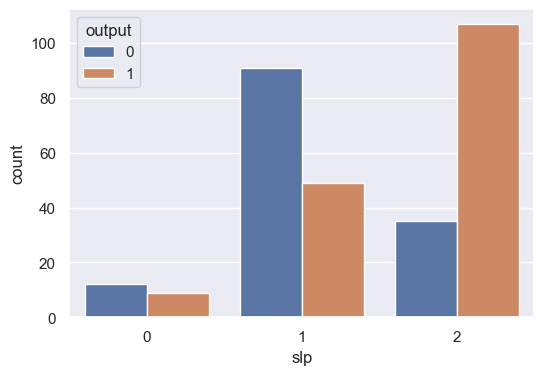

In [38]:
sns.countplot(x='slp',data=df,hue='output')

* patients with slope 2 (unsloping) are 3 times more likely to have a heart attack than not having one

##### caa - no. of major vessels

<Axes: xlabel='caa', ylabel='count'>

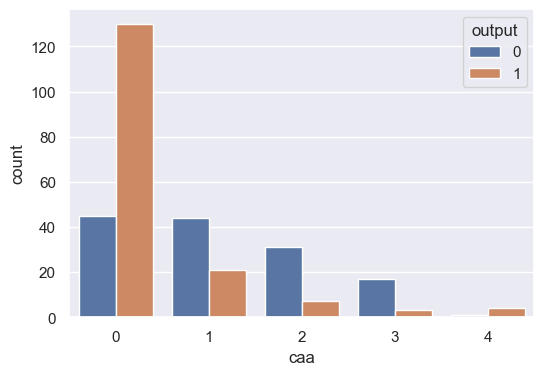

In [39]:
sns.countplot(x='caa',data=df,hue='output')

* the risk of heart attack is almost three times higher in patients with an observation value of 0.


##### thall - thallium stress test

<Axes: xlabel='thall', ylabel='count'>

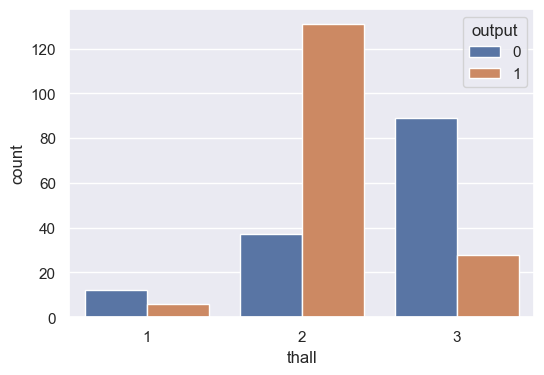

In [40]:
sns.countplot(x='thall',data=df,hue='output')

* Patients with an observation value of 2 are three times more likely to have a heart attack than not having one

#### correlation
* correlation of all the variables with chance of heart attack

In [41]:
df.corr().iloc[:,-1]

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.363322
output      1.000000
Name: output, dtype: float64

correlation of all variables with each other

In [42]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.066745,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.169125,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.087866,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.011209,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.013795,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.115310,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.225508,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210236,-0.430696


<Axes: >

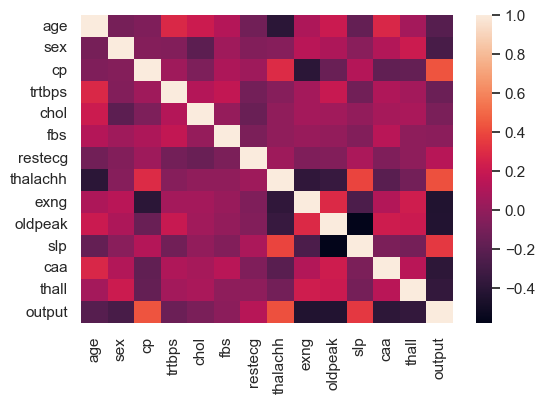

In [43]:
sns.heatmap(df.corr())

#### feature scaling

**robust scaler**


used when data contains outliers and is not normally distrivuted

In [44]:
from sklearn.preprocessing import RobustScaler

In [45]:
rbs=RobustScaler()

In [46]:
scaled_df=rbs.fit_transform(df[numeric_var])
sc=pd.DataFrame(scaled_df,columns=numeric_var)

In [47]:
df[categoric_var]

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


create df with scaled data

In [48]:
df2=df[categoric_var].join(sc)
df2

,sex,cp,fbs,restecg,exng,slp,caa,thall,output,age,trtbps,chol,thalachh,oldpeak
0,1,3,1,0,0,0,0,1,1,0.592593,0.75,-0.110236,-0.092308,0.9375
1,1,2,0,1,0,0,0,2,1,-1.333333,0.00,0.157480,1.046154,1.6875
2,0,1,0,0,0,2,0,2,1,-1.037037,0.00,-0.566929,0.584615,0.3750
3,1,1,0,1,0,2,0,2,1,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0,0,0,1,1,2,0,2,1,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0,0.148148,0.50,0.015748,-0.923077,-0.3750
299,1,3,0,1,0,1,0,3,0,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,1,0,1,1,0,1,2,3,0,0.962963,0.70,-0.740157,-0.369231,1.6250
301,1,0,0,1,1,1,1,3,0,0.148148,0.00,-1.716535,-1.169231,0.2500


#### applying one hot encoding to categorical variables

In [49]:
df[categoric_var] = df[categoric_var].astype(str)

In [50]:
df_c = pd.get_dummies(df2, columns=categoric_var[:-1], drop_first = True, dtype=int)
df_c

,output,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3
0,1,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
299,0,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
300,0,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
301,0,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,0,...,0,1,1,0,1,0,0,0,0,1


### Model Building


#### seperating data into test and train

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X=df_c.drop(['output'],axis=1)
y=df_c[['output']]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

#### model 1 - Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
lr= LogisticRegression()

In [56]:
lr.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_pred=lr.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ",accuracy)

Test Accuracy:  0.8387096774193549


cross validation

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
scores = cross_val_score(lr, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7416666666666667


#### model 2 - Decision tree algorithm

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt=DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [63]:
y_pred=dt.predict(X_test)

In [64]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.7741935483870968


cross validation

In [65]:
scores = cross_val_score(dt, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8416666666666666


#### model 3 - support vector machine algorithm

In [66]:
from sklearn.svm import SVC

In [67]:
sv=SVC(random_state=25)
sv.fit(X_train,y_train)

SVC(random_state=25)

In [68]:
y_pred=sv.predict(X_test)

In [69]:
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8387096774193549


cross validation

In [70]:
scores = cross_val_score(sv, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7416666666666667


#### model 4 - Random forest algorithm

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(random_state = 32)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=32)

In [73]:
y_pred=rf.predict(X_test)

In [74]:
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8387096774193549


cross validation

In [75]:
scores = cross_val_score(rf, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8083333333333332


##### conclusion

we should use the Random forest classification model as it has a 83.8% accuracy and 80.8% cross validation accuracy